# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
def alpha_func(D, idx):
    """
    Function to calculate alpha using Sepal.Width and Sepal.Length.
    """
    sepal_length = D.iloc[idx]['Sepal.Length']
    sepal_width = D.iloc[idx]['Sepal.Width']
    return np.corrcoef(sepal_length, sepal_width)[0, 1]


Test the code below

In [4]:
alpha_func(df, range(100))

-0.20592575599067023

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [5]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))


-0.2687943979274062

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

    Calculating the mean of Sepal.Length provides a single point estimate, but it does not account for the variability or uncertainty of that estimate. Bootstrapping allows us to assess the distribution of the mean and calculate confidence intervals, giving a more comprehensive understanding of the estimate's reliability.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [6]:
# Set the seed for reproducibility
np.random.seed(42)

def boot_SE(data, func, num_samples=1000):
    """
    Function to compute the bootstrap standard error.
    """
    n = len(data)
    stats = np.empty(num_samples)
    for i in range(num_samples):
        sample_indices = np.random.choice(n, n, replace=True)
        stats[i] = func(data, sample_indices)
    return np.std(stats)


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [7]:
boot_SE(df, alpha_func, num_samples=1000)



0.07433535324764183

_(vi)_ What is the original mean value of `Sepal.Length`?

In [8]:
original_mean_sepal_length = df['Sepal.Length'].mean()
original_mean_sepal_length


5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [9]:
def bootstrap_samples(data, num_samples=1000):
    """
    Function to create bootstrap samples.
    """
    return np.random.choice(data, (num_samples, len(data)), replace=True)

# Generate bootstrap samples for Sepal.Length
boot_se_samples = bootstrap_samples(df['Sepal.Length'], num_samples=1000)

# Compute bootstrapped mean and standard deviation
boot_means = np.mean(boot_se_samples, axis=1)
boot_mean = np.mean(boot_means)
boot_std = np.std(boot_means)
t_range = np.ptp(boot_means)

boot_mean, boot_std, t_range


(5.842439333333334, 0.06853610473968365, 0.44266666666666765)

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [10]:
confidence_interval = np.percentile(boot_means, [2.5, 97.5])
confidence_interval


array([5.70665   , 5.97733333])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

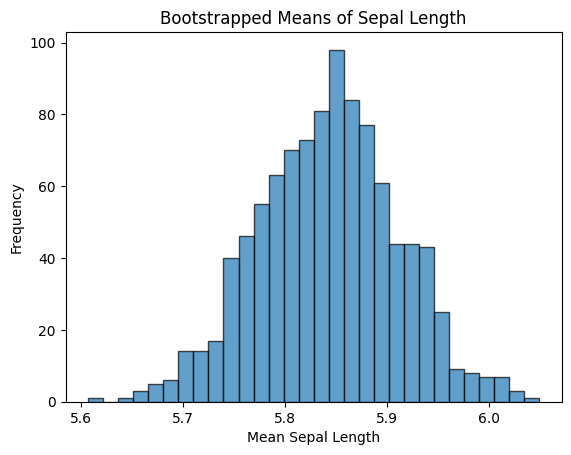

In [11]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_means, bins=30, edgecolor='k', alpha=0.7)

# Add a title
ax.set_title('Bootstrapped Means of Sepal Length')

# Add a label to the x-axis
ax.set_xlabel('Mean Sepal Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company?

    Based on the bootstrapped analysis, the mean Sepal.Length is approximately 5.84 with a 95% confidence interval of [5.70665   , 5.97733333]. This suggests that the mean Sepal.Length is a reliable estimate but has some variability. The shipping company should use the mean value of approximately 5.84 cm for space allotment but should consider the confidence interval to account for possible variations. This ensures they allocate enough space without underestimating or overestimating the required space.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
